In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Data Upload and Create 2 Dataframes to analysis for some Indicator IDs

In [2]:
## set csv file name that need to analysis
file_name = "API_19_DS2_en_csv_v2_3931355.csv"

In [3]:
## set interesting indicator ids to analysis from inidcators decription file
target_indicators = ['AG.LND.ARBL.ZS', 'AG.LND.AGRI.ZS', 'AG.LND.FRST.ZS','SP.URB.GROW', 'EN.ATM.GHGT.ZG', 'SP.POP.GROW']

## create a dictionary that have simple name instead of indicator ids
indicators_label = {'AG.LND.ARBL.ZS' : "ArableArea(%)", 'AG.LND.AGRI.ZS' : "AgriculturalArea(%)", 
                    'AG.LND.FRST.ZS' : "ForestArea(%)",'SP.POP.GROW' : "Population Growth(%)", 
                    'SP.URB.GROW' : "Urban Pop Growth(%)", 'EN.ATM.GHGT.ZG' : "GreenHouse Emission(%)"}

In [4]:
## define a function that receive file name and return filtered and formated 2 pandas dataframes to analysis
def get_dataframes(file_name):
    """
    this function is to get 2 pandas dataframes from give file name
    args:
      
      file_name : csv file name to be imported
      
    """
    df = pd.read_csv(file_name , skiprows=3)
    df_year_cols = df[df['Indicator Code'].isin(target_indicators)]  ## filter dataframe that have only specific indicators
    df_year_cols = df_year_cols.drop(['Country Code', 'Indicator Name', 'Unnamed: 65'], axis=1)
    df_year_cols.dropna(how='all')
    df_year_cols['Indicator Code'] = df_year_cols['Indicator Code'].map(indicators_label)
    df_year_cols = df_year_cols.set_index(['Country Name', 'Indicator Code'])
    
    ## convert dataframe that have country name as columns
    df_country_cols = df_year_cols.stack().reset_index()
    df_country_cols.columns = ['Country','Indicators' ,'Year','Value']
    df_country_cols = df_country_cols.set_index(['Year', 'Indicators', 'Country'])
    df_country_cols = df_country_cols.unstack('Country')
    df_country_cols.columns = df_country_cols.columns.droplevel(0)
    return df_year_cols, df_country_cols  ## one have year as columns and other have country name as columns

In [5]:
df_year_cols, df_country_cols = get_dataframes(file_name)
df_year_cols

1960       1961       1962       1963  \
Country Name Indicator Code                                                  
Aruba        Urban Pop Growth(%)      NaN   2.206183   1.404498   0.788835   
             Population Growth(%)     NaN   2.236462   1.432843   0.823502   
             GreenHouse Emission(%)   NaN        NaN        NaN        NaN   
             ForestArea(%)            NaN        NaN        NaN        NaN   
             ArableArea(%)            NaN  11.111111  11.111111  11.111111   
...                                   ...        ...        ...        ...   
Zimbabwe     Population Growth(%)     NaN   3.342246   3.378137   3.395753   
             GreenHouse Emission(%)   NaN        NaN        NaN        NaN   
             ForestArea(%)            NaN        NaN        NaN        NaN   
             ArableArea(%)            NaN   4.872690   5.001939   5.131188   
             AgriculturalArea(%)      NaN  28.396019  28.615743  28.835466   

                                          1964       1965       1966  \
Country Name Indicator Code                                            
Aruba        Urban Pop Growth(%)      0.551271   0.544810   0.569216   
             Population Growth(%)     0.580334   0.573498   0.599694   
             GreenHouse Emission(%)        NaN        NaN        NaN   
             ForestArea(%)                 NaN        NaN        NaN   
             ArableArea(%)           11.111111  11.111111  11.111111   
...                                        ...        ...        ...   
Zimbabwe     Population Growth(%)     3.390942   3.373608   3.346548   
             GreenHouse Emission(%)        NaN        NaN        NaN   
             ForestArea(%)                 NaN        NaN        NaN   
             ArableArea(%)            5.260437   5.337986   5.518935   
             AgriculturalArea(%)     29.055189  29.223213  29.494636   

                                          1967       1968       1969  ...  \
Country Name Indicator Code                                           ...   
Aruba        Urban Pop Growth(%)      0.562594   0.539158   0.579985  ...   
             Population Growth(%)     0.590951   0.572063   0.609680  ...   
             GreenHouse Emission(%)        NaN        NaN        NaN  ...   
             ForestArea(%)                 NaN        NaN        NaN  ...   
             ArableArea(%)           11.111111  11.111111  11.111111  ...   
...                                        ...        ...        ...  ...   
Zimbabwe     Population Growth(%)     3.328655   3.334614   3.370879  ...   
             GreenHouse Emission(%)        NaN        NaN        NaN  ...   
             ForestArea(%)                 NaN        NaN        NaN  ...   
             ArableArea(%)            5.648184   5.777433   5.906682  ...   
             AgriculturalArea(%)     29.714360  29.934083  30.153806  ...   

                                           2011        2012       2013  \
Country Name Indicator Code                                              
Aruba        Urban Pop Growth(%)       0.100461    0.543931   0.660561   
             Population Growth(%)      0.377979    0.503385   0.583290   
             GreenHouse Emission(%)         NaN         NaN        NaN   
             ForestArea(%)             2.333333    2.333333   2.333333   
             ArableArea(%)            11.111111   11.111111  11.111111   
...                                         ...         ...        ...   
Zimbabwe     Population Growth(%)      1.536406    1.698084   1.777672   
             GreenHouse Emission(%)  103.876779  105.289436        NaN   
             ForestArea(%)            46.165723   46.046633  45.927543   
             ArableArea(%)            10.856921   10.339925  10.339925   
             AgriculturalArea(%)      42.393693   41.876696  41.876696   

                                          2014       2015       2016  \
Country Name Indicator Code                     

In [6]:
df_country_cols

Country                    Afghanistan  Africa Eastern and Southern  \
Year Indicators                                                       
1960 Population Growth(%)          NaN                          NaN   
     Urban Pop Growth(%)           NaN                          NaN   
1961 AgriculturalArea(%)     57.745918                    43.672679   
     ArableArea(%)           11.717673                     4.735556   
     Population Growth(%)     1.898499                     2.539822   
...                                ...                          ...   
2019 Population Growth(%)     2.313073                     2.636666   
     Urban Pop Growth(%)      3.323827                     4.022683   
2020 ForestArea(%)            1.850994                    30.251786   
     Population Growth(%)     2.303812                     2.605427   
     Urban Pop Growth(%)      3.354421                     3.996400   

Country                    Africa Western and Central    Albania    Algeria  \
Year Indicators                                                               
1960 Population Growth(%)                    2.034308        NaN        NaN   
     Urban Pop Growth(%)                     6.605246        NaN        NaN   
1961 AgriculturalArea(%)                    33.441755  44.963504  19.091505   
     ArableArea(%)                           6.984022  15.766423   2.717341   
     Population Growth(%)                    2.085972   3.120855   2.487129   
...                                               ...        ...        ...   
2019 Population Growth(%)                    2.684152  -0.426007   1.933983   
     Urban Pop Growth(%)                     4.026718   1.071414   2.702067   
2020 ForestArea(%)                          19.816762  28.791971   0.818309   
     Population Growth(%)                    2.660902  -0.577942   1.836534   
     Urban Pop Growth(%)                     3.977272   0.853866   2.577066   

Country                    American Samoa    Andorra     Angola  \
Year Indicators                                                   
1960 Population Growth(%)             NaN        NaN        NaN   
     Urban Pop Growth(%)              NaN        NaN        NaN   
1961 AgriculturalArea(%)        15.000000  55.319149  45.857063   
     ArableArea(%)               5.000000   2.127660   2.141654   
     Population Growth(%)        2.347157   6.969856   1.392891   
...                                   ...        ...        ...   
2019 Population Growth(%)       -0.269019   0.179042   3.242914   
     Urban Pop Growth(%)        -0.275536   0.089910   4.249824   
2020 ForestArea(%)              85.650000  34.042553  53.426951   
     Population Growth(%)       -0.208128   0.154134   3.218530   
     Urban Pop Growth(%)        -0.201435   0.076581   4.192962   

Country                    Antigua and Barbuda  Arab World  ...  Uzbekistan  \
Year Indicators                                             ...               
1960 Population Growth(%)                  NaN         NaN  ...         NaN   
     Urban Pop Growth(%)                   NaN         NaN  ...         NaN   
1961 AgriculturalArea(%)             22.727273   27.835643  ...         NaN   
     ArableArea(%)                   18.181818    3.142108  ...         NaN   
     Population Growth(%)             1.599858    2.740659  ...    3.314275   
...                                        ...         ...  ...         ...   
2019 Population Growth(%)             0.861446    1.909788  ...    1.876470   
     Urban Pop Growth(%)              0.484385    2.385471  ...    1.787284   
2020 ForestArea(%)                   18.454545    2.812929  ...    8.375027   
     Population Growth(%)             0.833667    1.918912  ...    1.922127   
     Urban Pop Growth(%)              0.536397    2.383938  ...    1.888410   

Country                      Vanuatu  Venezuela, RB    Vietnam  \
Year Indicators                                                  
1960 Population 

## 2. Analysis for Overall World data using 2 dataframes

In [7]:
df_world = df_country_cols['World'].unstack('Indicators')
df_world

Indicators,AgriculturalArea(%),ArableArea(%),ForestArea(%),GreenHouse Emission(%),Population Growth(%),Urban Pop Growth(%)
Year,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN
1961,35.965095,9.656792,NaN,NaN,1.300724,2.799662
1962,36.044180,9.668757,NaN,NaN,1.724346,3.040897
1963,36.146651,9.756626,NaN,NaN,2.083322,3.225075
1964,36.236356,9.785195,NaN,NaN,2.053200,3.199038
...,...,...,...,...,...,...
2016,36.701221,10.764754,30.716421,NaN,1.168945,2.027240
2017,37.008413,10.831252,NaN,NaN,1.151723,1.996714
2018,36.903521,10.825170,NaN,NaN,1.107443,1.935414


In [8]:
def plot_individual_indicators(df, col, title = "Analysis for Overall World Area, Population and GreenHouse Gas\n\n"):
   
    """
    this function is to plot 6 indicators data for given column
   
   args : 
       df : dataframe to plot
       col : column name of df that need to be unstacked and analyzed
       title : overall titlename for 6 sub plots
       
    """
    df_world = df_country_cols[col].unstack('Indicators')
    ## plot Arable land, argricultural, Forest Area
    fig, axs = plt.subplots(3, 2)
    df_world[['ForestArea(%)']].plot(figsize=(20, 15), marker='o',color='red', ax=axs[0,0])
    axs[0,0].set_title('Changes of Forest Area', fontsize=12, color='red')

    df_world[['AgriculturalArea(%)']].plot(marker='o', color='blue', ax=axs[1,0])
    axs[1,0].set_title('Changes of Agricultural Area', fontsize=12, color='blue')

    df_world[['ArableArea(%)']].plot(marker='o',color='green', ax=axs[2,0])
    axs[2,0].set_title('Changes of Arable Area', fontsize=12, color='green')

    df_world[['GreenHouse Emission(%)']].plot(marker='o',color='red', ax=axs[0,1])
    axs[0,1].set_title('Total GreenHouse Gas Emissions(%)', fontsize=12, color='red')

    df_world[['Population Growth(%)']].plot(marker='o',color='blue', ax=axs[1,1])
    axs[1,1].set_title('Population Growth(Annual %)', fontsize=12, color='blue')

    df_world[['Urban Pop Growth(%)']].plot(marker='o',color='green', ax=axs[2,1])
    axs[2,1].set_title('Urban Pop Growth(Annual %)', fontsize=12, color='green')

    plt.suptitle(title, fontsize=20, color='blue')
    plt.show()

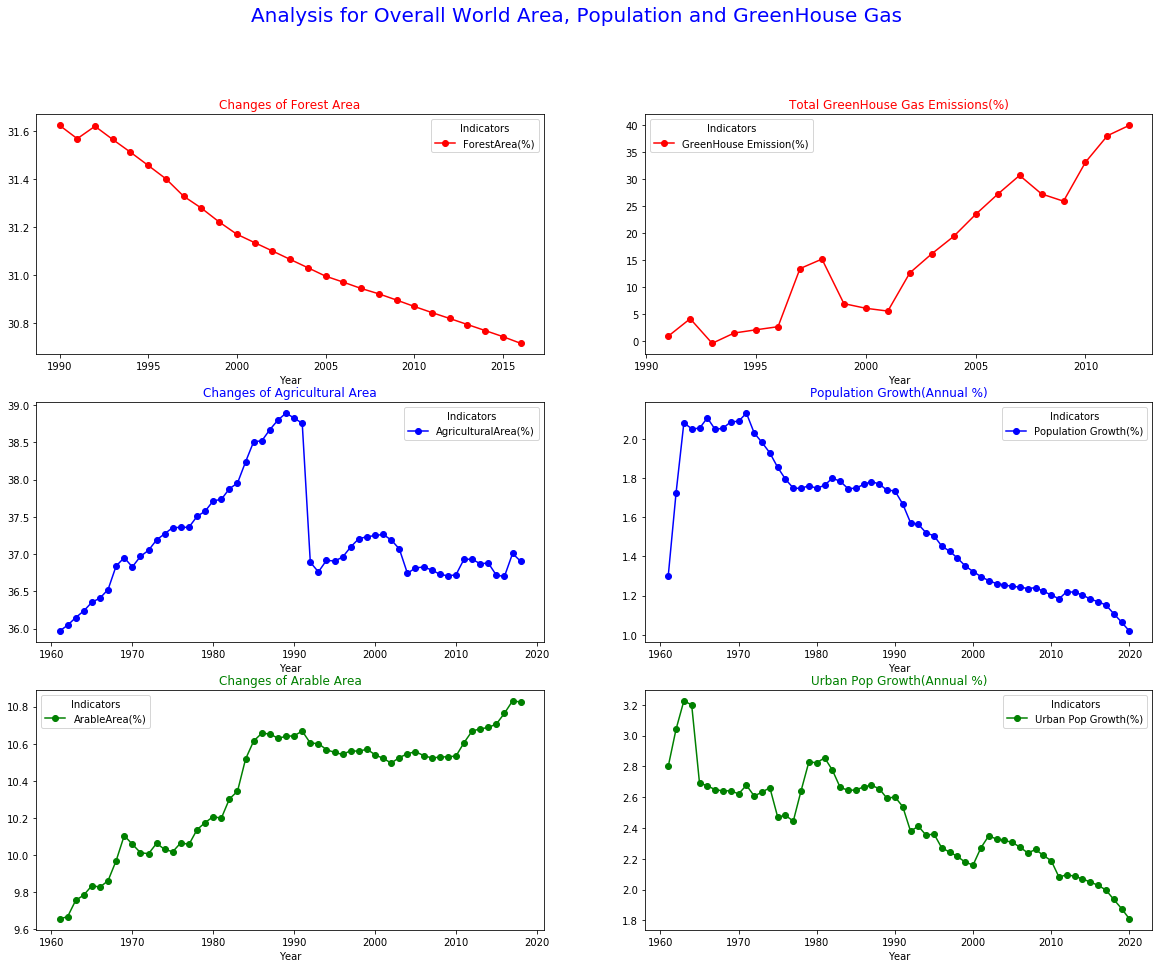

In [9]:
plot_individual_indicators(df_country_cols, 'World')

## 3. Analysis for countries that have highest Population Growth

In [10]:
groupby_country = df_year_cols.copy()
groupby_country['Average'] = groupby_country.mean(axis=1)
groupby_country[['Average']]

Average
Country Name Indicator Code                   
Aruba        Urban Pop Growth(%)      0.879440
             Population Growth(%)     1.129685
             GreenHouse Emission(%)        NaN
             ForestArea(%)            2.333333
             ArableArea(%)           11.111111
...                                        ...
Zimbabwe     Population Growth(%)     2.283375
             GreenHouse Emission(%)  50.761984
             ForestArea(%)           46.880264
             ArableArea(%)            7.877062
             AgriculturalArea(%)     35.277150

[1596 rows x 1 columns]

In [11]:
avg_country = groupby_country[['Average']].unstack('Indicator Code').sort_values(('Average','Population Growth(%)'),ascending = False)
avg_country.head(10)

Average                              \
Indicator Code            AgriculturalArea(%) ArableArea(%) ForestArea(%)   
Country Name                                                                
United Arab Emirates                 4.585704      0.431496      4.251392   
Qatar                                5.148688      0.702485      0.000000   
Kuwait                               7.962286      0.287356      0.297509   
Sint Maarten (Dutch part)                 NaN           NaN     10.882353   
Djibouti                            62.651290      0.050504      0.242075   
Jordan                              12.180891      2.732601      1.102339   
Bahrain                             11.680646      2.264987      0.600704   
St. Martin (French part)                  NaN           NaN     20.737192   
Oman                                 3.779484      0.097116      0.009495   
Saudi Arabia                        59.009317      1.222847      0.454484   

                                                                       \
Indicator Code            GreenHouse Emission(%) Population Growth(%)   
Country Name                                                            
United Arab Emirates                   81.498282             7.788348   
Qatar                                 193.389741             6.846083   
Kuwait                                       NaN             5.356569   
Sint Maarten (Dutch part)                    NaN             4.446067   
Djibouti                               18.458389             4.115391   
Jordan                                 68.364174             3.986560   
Bahrain                                25.594228             3.915122   
St. Martin (French part)                     NaN             3.823860   
Oman                                   28.365788             3.708709   
Saudi Arabia                                 NaN             3.570531   

                                               
Indicator Code            Urban Pop Growth(%)  
Country Name                                   
United Arab Emirates                 8.070317  
Qatar                                7.098760  
Kuwait                               5.870865  
Sint Maarten (Dutch part)            4.446067  
Djibouti                             4.847052  
Jordan                               4.963214  
Bahrain                              4.054603  
St. Martin (French part)                  NaN  
Oman                                 6.475818  
Saudi Arabia                         5.224211

In [12]:
def plot_top_10_countries(df, head = True, title= "Top 10 Countries that have highest Population Growth"):
   
    """
    this function is to find top 10 or tail 10 countries from data frame and plot Annual Percentages values for each country
    
    args :
         df : dataframe to be visuzalized
         head : true of false, if true : top 10 coutries, false : top lowest 10 countries
    """
    plt.figure(figsize=(10, 6))
    if head == True:
        plt.bar(df.head(10).index, df.head(10)[('Average','Population Growth(%)')])
    else:
        plt.bar(df.tail(10).index, df.tail(10)[('Average','Population Growth(%)')])
    plt.title(title, fontsize = 16, color='blue')
    plt.xticks(rotation = 45)
    plt.ylabel("Anual Percents(%)")
    plt.xlabel("Country Name")
    plt.show()

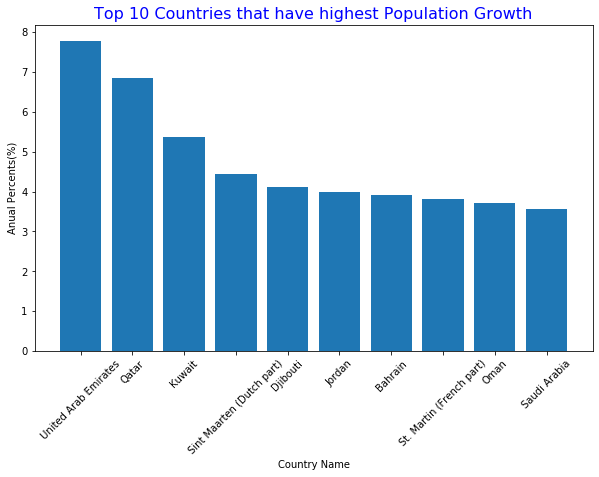

In [13]:
plot_top_10_countries(avg_country)

In [14]:
avg_country.tail(10)

Average                              \
Indicator Code         AgriculturalArea(%) ArableArea(%) ForestArea(%)   
Country Name                                                             
St. Kitts and Nevis              39.992516     24.883289     42.307692   
Ukraine                          71.622953     56.528028     16.428637   
Georgia                          39.173342      8.262207     40.149393   
Bosnia and Herzegovina           42.229745     19.093605     41.869919   
Lithuania                        47.952295     36.243325     33.309057   
Croatia                          28.108119     16.491662     33.849882   
Hungary                          69.757449     54.001674     21.809159   
Latvia                           30.019359     19.054807     53.093132   
Bulgaria                         52.217695     34.256902     32.723801   
Not classified                         NaN           NaN           NaN   

                                                                    \
Indicator Code         GreenHouse Emission(%) Population Growth(%)   
Country Name                                                         
St. Kitts and Nevis                       NaN             0.063647   
Ukraine                            -46.196359             0.056459   
Georgia                            -61.378266             0.030981   
Bosnia and Herzegovina             -38.601205             0.028255   
Lithuania                          -48.786501             0.009659   
Croatia                            -18.564107            -0.037857   
Hungary                            -22.939280            -0.039563   
Latvia                             -51.378628            -0.182016   
Bulgaria                           -32.842117            -0.210476   
Not classified                            NaN                  NaN   

                                            
Indicator Code         Urban Pop Growth(%)  
Country Name                                
St. Kitts and Nevis               0.246201  
Ukraine                           0.718405  
Georgia                           0.568285  
Bosnia and Herzegovina            1.604401  
Lithuania                         0.917820  
Croatia                           1.039458  
Hungary                           0.380602  
Latvia                            0.245235  
Bulgaria                          0.977818  
Not classified                         NaN

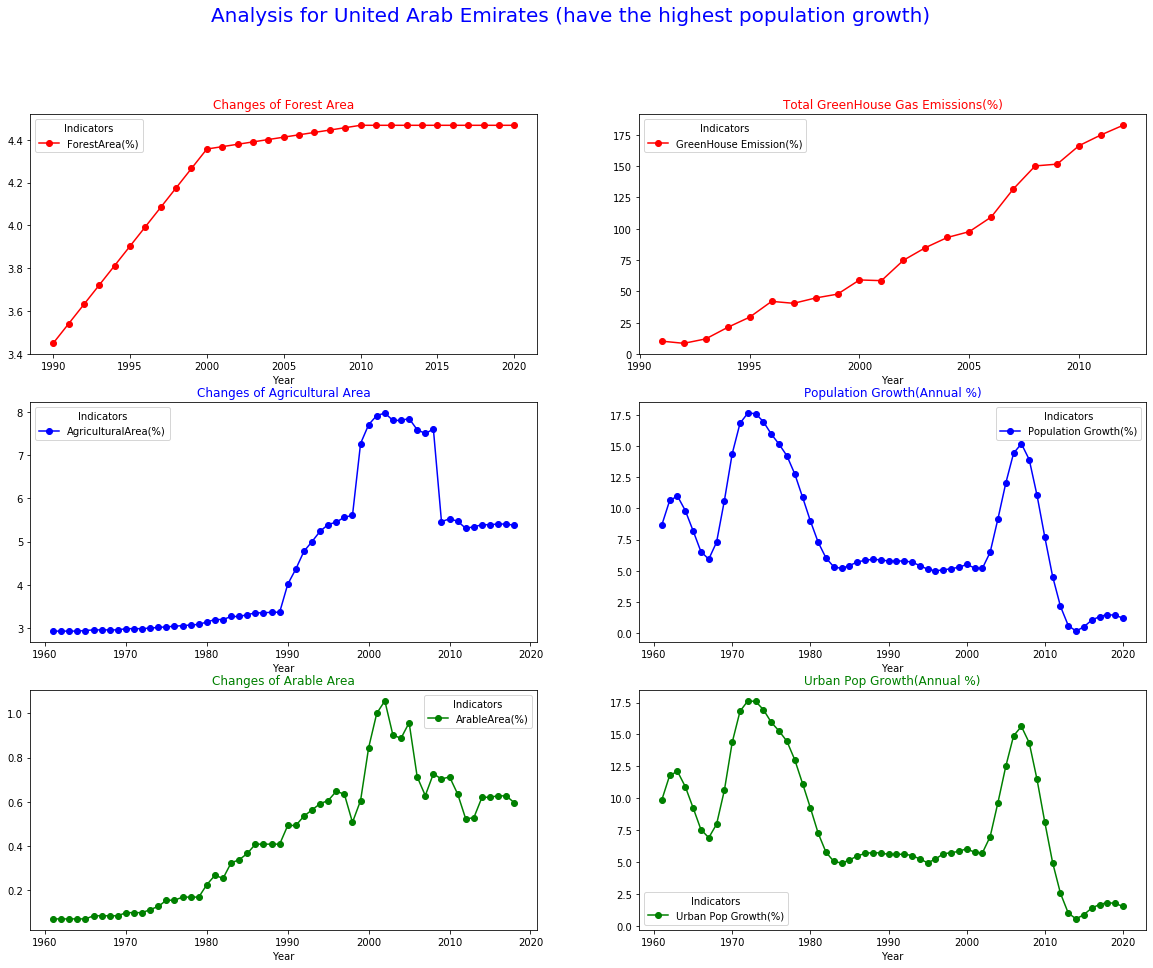

In [15]:
plot_individual_indicators(df_country_cols, 'United Arab Emirates', 
                           title = "Analysis for United Arab Emirates (have the highest population growth)\n\n")

## 4. Analysis for Countries that have the lowest Population Growth

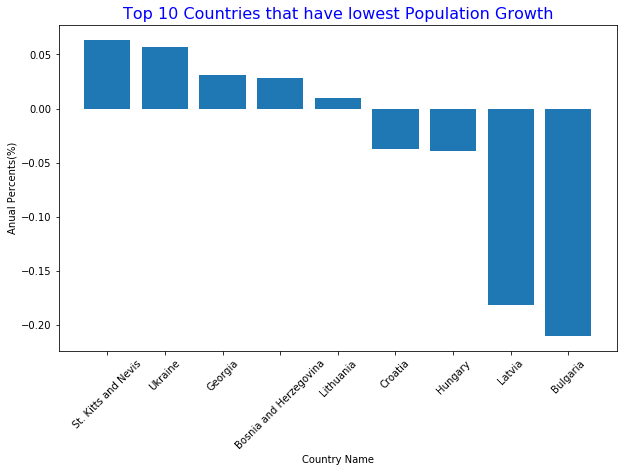

In [16]:
plot_top_10_countries(avg_country, head = False, title = "Top 10 Countries that have lowest Population Growth")

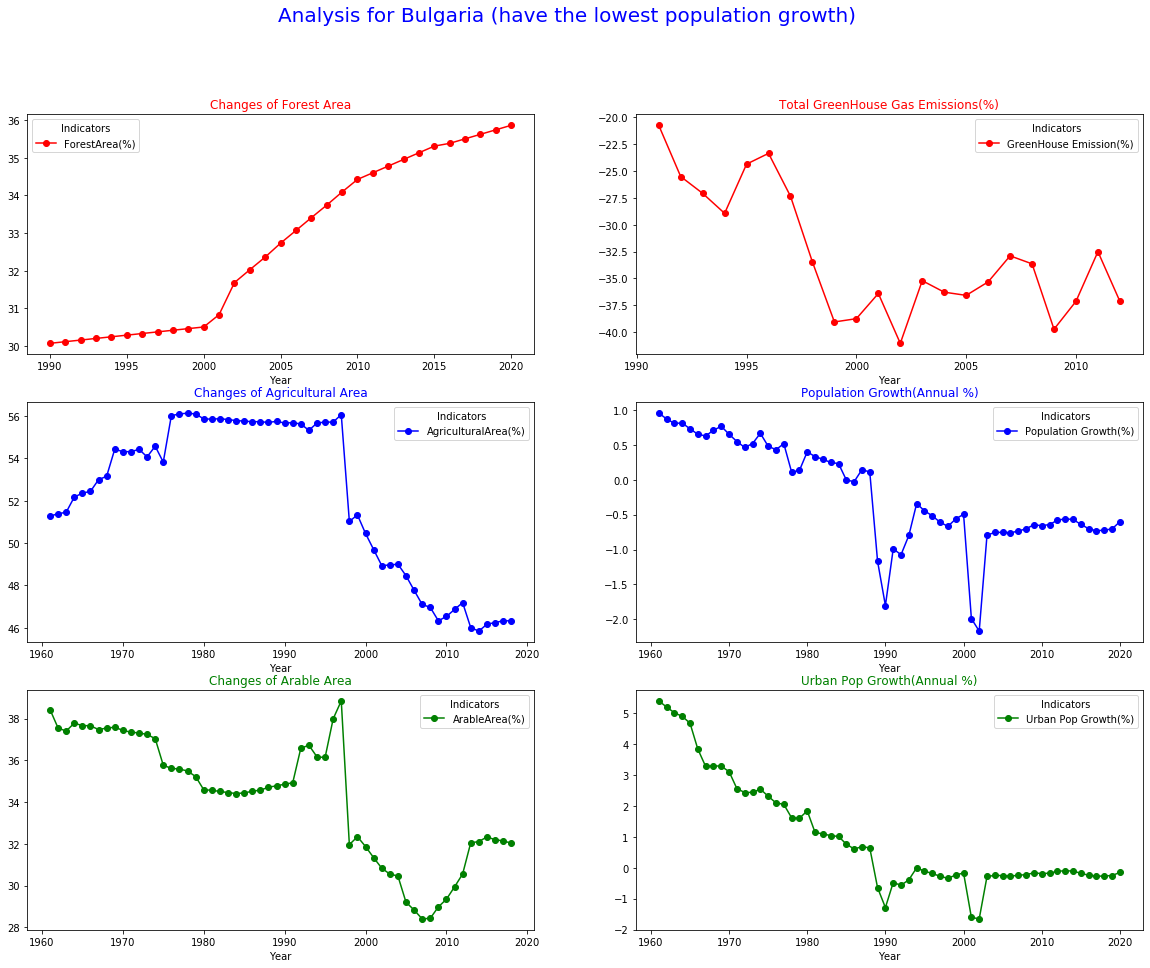

In [17]:
plot_individual_indicators(df_country_cols, 'Bulgaria', 
                           title = "Analysis for Bulgaria (have the lowest population growth)\n\n")